In [76]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GOAL: Create usable biomechanics data visualization for the Wake Forest baseball team and coaching staff

# Download csv file of biomechanics data

wakedf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\WakePitchersAsOfJan2021.csv')
wakedf = wakedf.drop(columns = ['Unnamed: 0'])
wakedf

,Unnamed: 1,Unnamed: 2,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@Footstrike.2,Lead_Knee_Angle@Footstrike,...,Max_Shoulder_Hor_Abd_Torque.1,Max_Shoulder_Hor_Add_Torque,Elbow_Torque@Max_Shoulder_Rot,Elbow_Torque@Release,Pitching_Elbow_Angle@Release,Pitching_Elbow_Angle@Release.1,Pitching_Elbow_Angle@Release.2,Pitching_Elbow_Angle_max,Pitching_Elbow_Angle_max.1,Pitching_Elbow_Angle_max.2
0,NaN,NaN,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,...,EVENT_LABEL,EVENT_LABEL,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC
1,NaN,NaN,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,...,ORIGINAL,ORIGINAL,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED
2,NaN,NaN,X,Y,Z,X,X,Y,Z,X,...,X,X,X,X,X,Y,Z,X,Y,Z
3,AM,Breaking Ball RH 1.c3d,447.417145,115.749641,360.118927,1.699206,25.344067,7.582581,37.648571,29.001602,...,NaN,2.372,-0.00312,-0.01741,17.77682,-3.52921,-69.57805,109.66978,15.62593,-41.75812
4,AM,Breaking Ball RH 2.c3d,442.906586,139.731674,324.02356,1.58675,7.837628,-12.884592,44.36829,42.986298,...,NaN,1.568,0.00041,-0.02035,14.81031,-4.94527,-65.53112,118.38982,16.82565,-33.91401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,WA,Off Speed RH 3.c3d,425.348267,210.92865,285.726746,1.689309,12.767086,4.536453,63.951683,46.942848,...,NaN,3.69667,0.01147,-0.01325,25.91226,21.41368,-52.75742,120.5332,30.77501,-30.20061
370,WF,Breaking Ball RH 1.c3d,476.96637,145.885223,267.351135,1.732077,12.781916,-0.655268,31.712303,48.794037,...,2.032,NaN,NaN,NaN,16.08992,-7.03863,77.15968,83.37768,0.49597,83.23711
371,WF,Fastball RH 2.c3d,472.78009,124.608902,305.572144,1.884336,13.166245,-4.100532,34.29747,51.383347,...,1.56,NaN,NaN,NaN,14.95552,-4.74176,84.83462,88.69725,3.70082,109.74193
372,WF,Fastball RH 3.c3d,491.521118,168.14621,239.631256,1.950241,8.84278,-3.583838,35.14053,51.705925,...,2.54,NaN,NaN,NaN,16.00492,-4.66646,83.89753,90.32365,3.53192,118.78202


In [77]:
# Delete useless rows

WFdf = wakedf.drop([0, 1, 2])
WFdf

# Rename Unnamed columns

WFdf.rename(columns = {'Unnamed: 1':'Pitcher'}, inplace = True) 
WFdf.rename(columns = {'Unnamed: 2':'PitchType'}, inplace = True) 
WFdf

,Pitcher,PitchType,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@Footstrike.2,Lead_Knee_Angle@Footstrike,...,Max_Shoulder_Hor_Abd_Torque.1,Max_Shoulder_Hor_Add_Torque,Elbow_Torque@Max_Shoulder_Rot,Elbow_Torque@Release,Pitching_Elbow_Angle@Release,Pitching_Elbow_Angle@Release.1,Pitching_Elbow_Angle@Release.2,Pitching_Elbow_Angle_max,Pitching_Elbow_Angle_max.1,Pitching_Elbow_Angle_max.2
3,AM,Breaking Ball RH 1.c3d,447.417145,115.749641,360.118927,1.699206,25.344067,7.582581,37.648571,29.001602,...,NaN,2.372,-0.00312,-0.01741,17.77682,-3.52921,-69.57805,109.66978,15.62593,-41.75812
4,AM,Breaking Ball RH 2.c3d,442.906586,139.731674,324.02356,1.58675,7.837628,-12.884592,44.36829,42.986298,...,NaN,1.568,0.00041,-0.02035,14.81031,-4.94527,-65.53112,118.38982,16.82565,-33.91401
5,AM,Fastball RH 1.c3d,418.166321,129.898682,315.67627,1.762823,24.120113,0.584901,42.150604,29.031528,...,NaN,1.84,0.00421,-0.00701,8.16356,0.89832,-75.91105,114.94846,18.45097,-54.36364
6,AM,Fastball RH 2.c3d,416.739197,128.615387,312.474976,1.650237,23.981058,1.614084,43.153107,31.275621,...,NaN,3.252,-0.00055,-0.02147,17.69385,-5.32543,-83.72028,113.73364,17.98087,-62.50832
7,AM,Fastball RH 3.c3d,463.277435,106.045303,405.940674,1.695989,10.621145,-7.608779,43.985134,45.006199,...,NaN,3.344,0.00393,-0.01025,14.46912,-5.32881,-90.60345,121.48134,18.4576,-59.8975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,WA,Off Speed RH 3.c3d,425.348267,210.92865,285.726746,1.689309,12.767086,4.536453,63.951683,46.942848,...,NaN,3.69667,0.01147,-0.01325,25.91226,21.41368,-52.75742,120.5332,30.77501,-30.20061
370,WF,Breaking Ball RH 1.c3d,476.96637,145.885223,267.351135,1.732077,12.781916,-0.655268,31.712303,48.794037,...,2.032,NaN,NaN,NaN,16.08992,-7.03863,77.15968,83.37768,0.49597,83.23711
371,WF,Fastball RH 2.c3d,472.78009,124.608902,305.572144,1.884336,13.166245,-4.100532,34.29747,51.383347,...,1.56,NaN,NaN,NaN,14.95552,-4.74176,84.83462,88.69725,3.70082,109.74193
372,WF,Fastball RH 3.c3d,491.521118,168.14621,239.631256,1.950241,8.84278,-3.583838,35.14053,51.705925,...,2.54,NaN,NaN,NaN,16.00492,-4.66646,83.89753,90.32365,3.53192,118.78202


In [78]:
# Filter out just fastballs

wakefb = WFdf[WFdf['PitchType'].str.contains('Fastball')]
wakefb

,Pitcher,PitchType,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@Footstrike.2,Lead_Knee_Angle@Footstrike,...,Max_Shoulder_Hor_Abd_Torque.1,Max_Shoulder_Hor_Add_Torque,Elbow_Torque@Max_Shoulder_Rot,Elbow_Torque@Release,Pitching_Elbow_Angle@Release,Pitching_Elbow_Angle@Release.1,Pitching_Elbow_Angle@Release.2,Pitching_Elbow_Angle_max,Pitching_Elbow_Angle_max.1,Pitching_Elbow_Angle_max.2
5,AM,Fastball RH 1.c3d,418.166321,129.898682,315.67627,1.762823,24.120113,0.584901,42.150604,29.031528,...,NaN,1.84,0.00421,-0.00701,8.16356,0.89832,-75.91105,114.94846,18.45097,-54.36364
6,AM,Fastball RH 2.c3d,416.739197,128.615387,312.474976,1.650237,23.981058,1.614084,43.153107,31.275621,...,NaN,3.252,-0.00055,-0.02147,17.69385,-5.32543,-83.72028,113.73364,17.98087,-62.50832
7,AM,Fastball RH 3.c3d,463.277435,106.045303,405.940674,1.695989,10.621145,-7.608779,43.985134,45.006199,...,NaN,3.344,0.00393,-0.01025,14.46912,-5.32881,-90.60345,121.48134,18.4576,-59.8975
12,AM,Fastball RH 1.c3d,475.484375,137.960449,218.998596,1.678991,22.040331,2.672199,49.209362,33.116295,...,NaN,1.928,0.00013,-0.01208,14.93136,-4.03465,-89.30856,113.25269,16.24556,-54.43756
13,AM,Fastball RH 2.c3d,447.303436,136.876556,232.643463,1.626184,19.756073,-0.077313,45.027069,33.889011,...,NaN,1.596,0.00162,-0.01114,14.14611,-6.06779,-94.62462,111.35855,15.85747,-57.83587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,WA,Fastball RH 2.c3d,468.544006,114.637657,305.551575,1.573714,18.77655,5.481593,61.3512,53.788975,...,NaN,6.61667,0.00854,-0.00468,26.49893,12.05446,-102.55173,127.35921,26.89344,-73.83244
366,WA,Fastball RH 3.c3d,490.269135,118.045311,323.667267,1.595325,22.789043,7.006543,58.740433,57.980034,...,NaN,4.59667,0.00843,0.00928,26.19729,12.00171,-102.42304,127.61462,26.16654,-76.19609
371,WF,Fastball RH 2.c3d,472.78009,124.608902,305.572144,1.884336,13.166245,-4.100532,34.29747,51.383347,...,1.56,NaN,NaN,NaN,14.95552,-4.74176,84.83462,88.69725,3.70082,109.74193
372,WF,Fastball RH 3.c3d,491.521118,168.14621,239.631256,1.950241,8.84278,-3.583838,35.14053,51.705925,...,2.54,NaN,NaN,NaN,16.00492,-4.66646,83.89753,90.32365,3.53192,118.78202


In [79]:
# Covert columns to floats

wakefb['Pelvis_Ang_Vel_max'] = wakefb['Pelvis_Ang_Vel_max'].astype(float)
wakefb['Thorax_Ang_Vel_max'] = wakefb['Thorax_Ang_Vel_max'].astype(float)
wakefb['Pitching_Humerus_Ang_Vel_max'] = wakefb['Pitching_Humerus_Ang_Vel_max'].astype(float)
wakefb['Pitching_Hand_Ang_Vel_max'] = wakefb['Pitching_Hand_Ang_Vel_max'].astype(float)
wakefb['Pitching_Elbow_Angle@Max_Shoulder_RotX'] = wakefb['Pitching_Elbow_Angle@Max_Shoulder_RotX'].astype(float)

<ipython-input-79-080925922aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wakefb['Pelvis_Ang_Vel_max'] = wakefb['Pelvis_Ang_Vel_max'].astype(float)
<ipython-input-79-080925922aeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wakefb['Thorax_Ang_Vel_max'] = wakefb['Thorax_Ang_Vel_max'].astype(float)
<ipython-input-79-080925922aeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [80]:
# Pull min and max values from kinematic sequence metrics

pelvismax = wakefb['Pelvis_Ang_Vel_max'].max()
thoraxmax = wakefb['Thorax_Ang_Vel_max'].max()
humerusmax = wakefb['Pitching_Humerus_Ang_Vel_max'].max()
handmax = wakefb['Pitching_Hand_Ang_Vel_max'].max()

pelvismin = wakefb['Pelvis_Ang_Vel_max'].min()
thoraxmin = wakefb['Thorax_Ang_Vel_max'].min()
humerusmin = wakefb['Pitching_Humerus_Ang_Vel_max'].min()
handmin = wakefb['Pitching_Hand_Ang_Vel_max'].min()

print("Pelvis angluar velocity min: ", pelvismin, " and max: ", pelvismax)
print("Thorax angluar velocity min: ", thoraxmin, " and max: ", thoraxmax)
print("Pitching humerus angluar velocity min: ", humerusmin, " and max: ", humerusmax)
print("Pitching hand angluar velocity min: ", handmin, " and max: ", handmax)

Pelvis angluar velocity min:  468.050781  and max:  967.925354
Thorax angluar velocity min:  868.682251  and max:  1462.364746
Pitching humerus angluar velocity min:  3857.48999  and max:  8411.916016
Pitching hand angluar velocity min:  2271.743896  and max:  18931.30273


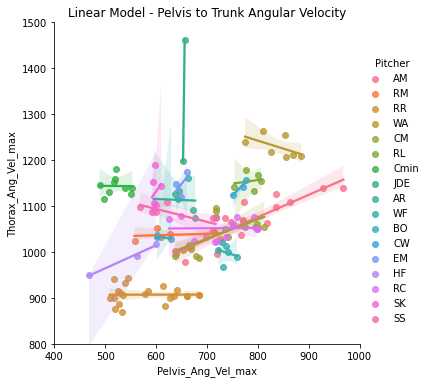

In [81]:
# Linear model plot of kinematic sequences points
# Pelvis angular velocity VS Thorax angular velocity

sequence = sns.lmplot(x='Pelvis_Ang_Vel_max', y='Thorax_Ang_Vel_max', data=wakefb, hue='Pitcher')
sequence.set(xlim=(400, 1000))
sequence.set(ylim=(800, 1500))
sequence.set(title="Linear Model - Pelvis to Trunk Angular Velocity")

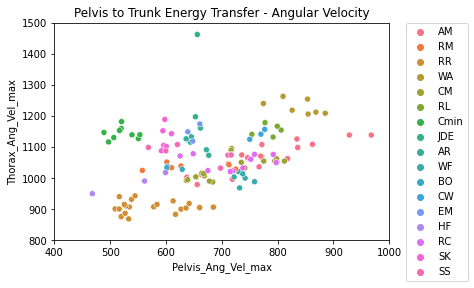

In [82]:
# Scatter plot of kinematic sequences points 1 & 2
# Pelvis angular velocity VS Thorax angular velocity

ksequence1 = sns.scatterplot(x='Pelvis_Ang_Vel_max', y='Thorax_Ang_Vel_max', data=wakefb, hue='Pitcher')
ksequence1.set(xlim=(400, 1000))
ksequence1.set(ylim=(800, 1500))
ksequence1.set(title="Pelvis to Trunk Energy Transfer - Angular Velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

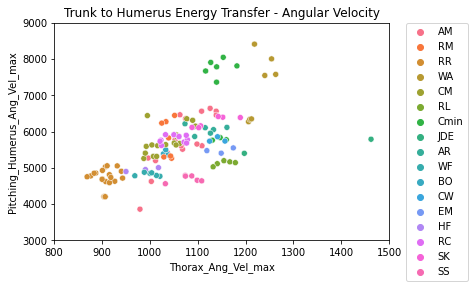

In [83]:
# Scatter plot of kinematic sequences points 2 & 3
# Thorax angular velocity VS Pitching humerus angular velocity

ksequence2 = sns.scatterplot(x='Thorax_Ang_Vel_max', y='Pitching_Humerus_Ang_Vel_max', data=wakefb, hue='Pitcher')
ksequence2.set(xlim=(800, 1500))
ksequence2.set(ylim=(3000, 9000))
ksequence2.set(title="Trunk to Humerus Energy Transfer - Angular Velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

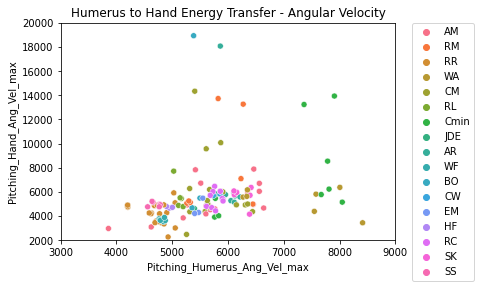

In [84]:
# Scatter plot of kinematic sequences points 3 & 4
# Pitching humerus angular velocity VS Pitching hand angular velocity

ksequence3 = sns.scatterplot(x='Pitching_Humerus_Ang_Vel_max', y='Pitching_Hand_Ang_Vel_max', data=wakefb, hue='Pitcher')
ksequence3.set(xlim=(3000, 9000))
ksequence3.set(ylim=(2000, 20000))
ksequence3.set(title="Humerus to Hand Energy Transfer - Angular Velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

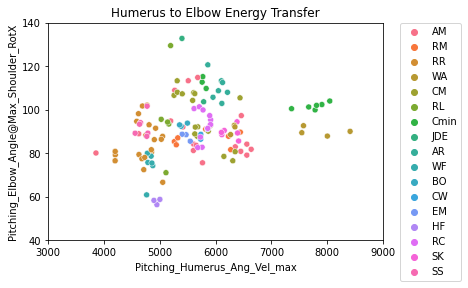

In [85]:
# Look into elbow extension velocity instead of hand angular velocity

elbowext = sns.scatterplot(x='Pitching_Humerus_Ang_Vel_max', y='Pitching_Elbow_Angle@Max_Shoulder_RotX', data=wakefb, hue='Pitcher')
elbowext.set(xlim=(3000, 9000))
elbowext.set(ylim=(40, 140))
elbowext.set(title="Humerus to Elbow Energy Transfer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [86]:
# Import cleaned up biomechanics data from Coby's script

cleandf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\AddingPitchUIDWakePitchersJan2021.csv')
cleandf = cleandf.drop(columns=['Unnamed: 0', 'Unnamed: 1_ITEM', 'Pitcher'])
cleandf['Pitch Type'] = cleandf['Pitch Type'].str.strip()
cleandf['PitcherID'] = cleandf['PitcherID'].astype(str)

#Change Pitch Type names to normal Fastball, Breaking Ball, and Off speed
sep = '.'
cleandf['Pitch Type'] = cleandf['Pitch Type'].str.split(sep, expand=True)
cleandf['Pitch Type'] = cleandf['Pitch Type'].str.rsplit(' ', 2, expand=True)[0]
cleandf['Pitch Type'] = cleandf['Pitch Type'].str.replace('RH', '')
cleandf['Pitch Type'] = cleandf['Pitch Type'].str.replace('LH', '')

# Fill blank cells
cleandf = cleandf.replace(r'^\s*$', np.NaN, regex=True)
cleandf

,PitcherID,Height,Weight,MoCap Session,Pitch Type,Date,BALL_RELEASE_SPEED_mph_X,PitchUID,Lead_Knee_Ang_Vel_Max_X,Lead_Knee_Ang_Vel_Max.1_Y,...,Max_Shoulder_Hor_Abd_Torque.1_X,Max_Shoulder_Hor_Add_Torque_X,Elbow_Torque_Max_Shoulder_Rot_X,Elbow_Torque_Release_X,Pitching_Elbow_Angle_Release.3_X,Pitching_Elbow_Angle_Release.4_Y,Pitching_Elbow_Angle_Release.5_Z,Pitching_Elbow_Angle_max_X,Pitching_Elbow_Angle_max.1_Y,Pitching_Elbow_Angle_max.2_Z
0,1000054016,74.0,215,Baseball Right-handed,Breaking Ball,12/10/2019,74.4,NaN,432.230865,279.017181,...,2.788,NaN,NaN,NaN,42.33256,-2.79811,60.38411,134.99356,9.56293,132.00633
1,1000054016,74.0,215,Baseball Right-handed,Breaking Ball,12/10/2019,74.4,NaN,403.951599,238.748566,...,1.528,NaN,NaN,NaN,35.05440,-3.13035,83.61273,140.16342,23.06075,108.95536
2,1000054016,74.0,215,Baseball Right-handed,Fastball,12/10/2019,86.5,NaN,392.202271,145.681915,...,2.436,NaN,NaN,NaN,50.05914,-5.62187,73.30039,135.58011,12.55730,140.92935
3,1000054016,74.0,215,Baseball Right-handed,Off Speed,12/10/2019,NaN,NaN,452.098755,144.242065,...,2.736,NaN,NaN,NaN,21.68150,5.14500,78.11906,135.64514,12.97087,141.45239
4,1000054016,74.0,215,Baseball Right-handed,Off Speed,12/10/2019,86.3,NaN,427.813812,117.309105,...,2.340,NaN,NaN,NaN,29.89357,2.75379,72.60512,136.60185,11.58399,142.85722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1000017376,76.0,218,Baseball Right-handed_2,Fastball,1/23/2020,93.5,NaN,543.581177,158.277954,...,8.048,NaN,NaN,NaN,23.03139,-1.57539,101.57141,92.53104,4.54408,124.00944
360,1000017376,76.0,218,Baseball Right-handed_2,Fastball,1/23/2020,94.5,NaN,550.453918,155.011963,...,4.812,NaN,NaN,NaN,18.08355,2.13855,97.53362,91.90330,5.45909,142.22403
361,1000017376,76.0,218,Baseball Right-handed_2,Fastball,1/23/2020,92.4,NaN,512.933228,184.476776,...,3.572,NaN,NaN,NaN,19.47892,0.03175,100.60904,93.16944,4.50974,129.68066
362,1000017376,76.0,218,Baseball Right-handed_2,Off Speed,1/23/2020,85.3,NaN,483.463348,194.772156,...,3.504,NaN,NaN,NaN,15.56306,4.03081,101.36720,88.21321,4.03081,131.89348


In [87]:
# Calculate mph per unit of force/torque in elbow and shoulder

def elbowflexefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Elbow_Flex_Torque.1_X']

cleandf['elbowflexefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Elbow_Flex_Torque.1_X']].apply(elbowflexefficiency,axis=1)

def elbowvalgusefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Elbow_Valgus_Torque.1_X']

cleandf['elbowvalgusefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Elbow_Valgus_Torque.1_X']].apply(elbowvalgusefficiency,axis=1)

def elbowvarusefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Elbow_Varus_Torque_X']

cleandf['elbowvarusefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Elbow_Varus_Torque_X']].apply(elbowvarusefficiency,axis=1)

def shouldabdefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Shoulder_Abd_Torque.1_X']

cleandf['shouldabdefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Shoulder_Abd_Torque.1_X']].apply(shouldabdefficiency,axis=1)

def shouldhorzabdefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Shoulder_Hor_Abd_Torque.1_X']

cleandf['shouldhorzabdefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Shoulder_Hor_Abd_Torque.1_X']].apply(shouldhorzabdefficiency,axis=1)

def shouldhorzaddefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Shoulder_Hor_Add_Torque_X']

cleandf['shouldhorzaddefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Shoulder_Hor_Add_Torque_X']].apply(shouldhorzaddefficiency,axis=1)

def shoulddistefficiency(cleandf):
    return cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Shoulder_Dist_Force.1_X']

cleandf['shoulddistefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Shoulder_Dist_Force.1_X']].apply(shoulddistefficiency,axis=1)

def shouldintrotefficiency(cleandf):
    return abs(cleandf['BALL_RELEASE_SPEED_mph_X'] / cleandf['Max_Shoulder_IntRot_Torque_X'])

cleandf['shouldintrotefficiency'] = cleandf[['BALL_RELEASE_SPEED_mph_X', 'Max_Shoulder_IntRot_Torque_X']].apply(shouldintrotefficiency,axis=1)

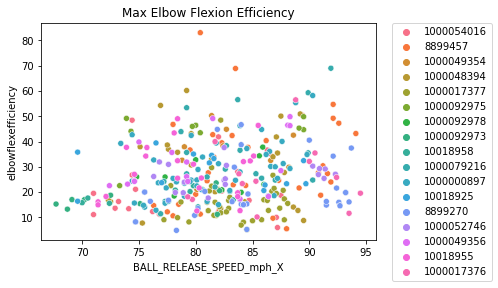

In [88]:
# Max Eblow Flexion Torque - Scatterplot

elbowflextorque = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='elbowflexefficiency', data=cleandf, hue='PitcherID')
elbowflextorque.set(title="Max Elbow Flexion Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

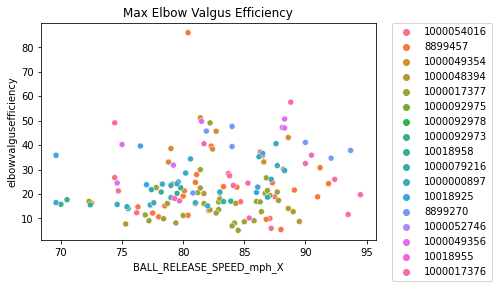

In [89]:
# Max Eblow Valgus Torque - Scatterplot

elbowvalgustorque = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='elbowvalgusefficiency', data=cleandf, hue='PitcherID')
elbowvalgustorque.set(title="Max Elbow Valgus Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

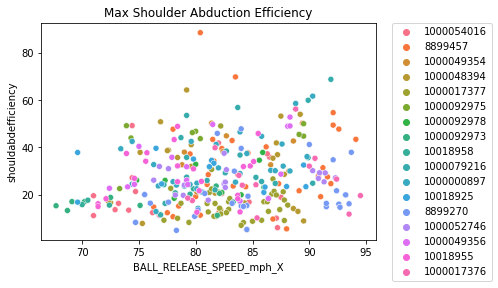

In [90]:
# Max Shoulder Abduction Torque - Scatterplot

shouldadbtorque = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='shouldabdefficiency', data=cleandf, hue='PitcherID')
shouldadbtorque.set(title="Max Shoulder Abduction Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

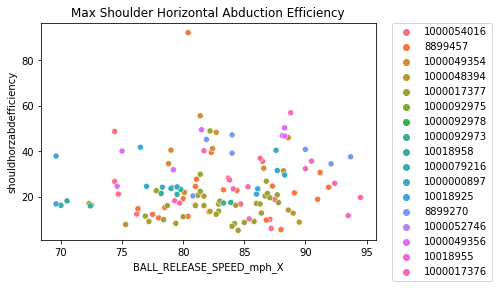

In [91]:
# Max Shoulder Horizontal Abduction Torque - Scatterplot

shouldhorzabdtorque = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='shouldhorzabdefficiency', data=cleandf, hue='PitcherID')
shouldhorzabdtorque.set(title="Max Shoulder Horizontal Abduction Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

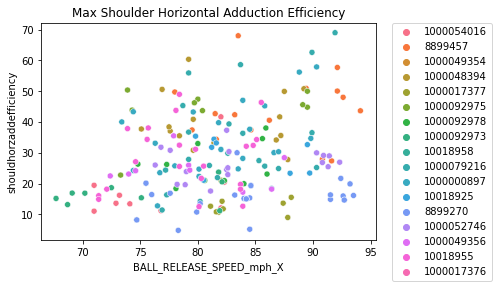

In [92]:
# Max Shoulder Horizontal Adduction Torque - Scatterplot

shouldhorzabdtorque = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='shouldhorzaddefficiency', data=cleandf, hue='PitcherID')
shouldhorzabdtorque.set(title="Max Shoulder Horizontal Adduction Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

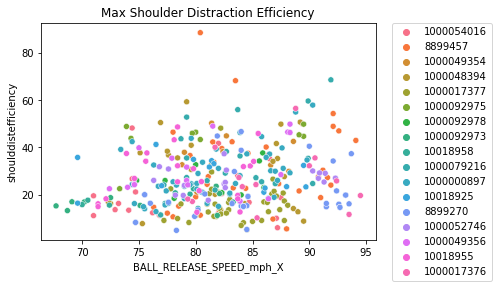

In [93]:
# Max Shoulder Distraction Force - Scatterplot

shoulddistforce = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='shoulddistefficiency', data=cleandf, hue='PitcherID')
shoulddistforce.set(title="Max Shoulder Distraction Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

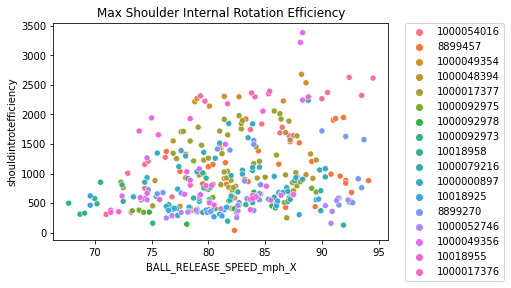

In [94]:
# Max Shoulder Internal Rotation Torque - Scatterplot

shouldintrottorque = sns.scatterplot(x='BALL_RELEASE_SPEED_mph_X', y='shouldintrotefficiency', data=cleandf, hue='PitcherID')
shouldintrottorque.set(title="Max Shoulder Internal Rotation Efficiency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [95]:
# Calculate average efficiencies for whole pitching staff
# Display average efficiencies for each pitcher
# Rank pitchers by average efficiency for each type
# Filter for fastballs only

cleanfb = cleandf[cleandf['Pitch Type'].str.contains('Fastball')]

cleanfb.groupby('PitcherID')['elbowflexefficiency'].mean().sort_values(ascending=False)

PitcherID
1000092975    46.598334
1000079216    38.004348
1000049354    34.953174
1000049356    34.427238
8899457       33.517435
1000000897    32.150570
1000092978    31.710907
1000048394    30.608033
1000017376    30.177870
1000052746    28.015191
10018955      27.940279
10018925      24.484436
8899270       22.143462
1000054016    20.612500
1000092973    18.445835
10018958      16.971273
1000017377    14.596703
Name: elbowflexefficiency, dtype: float64

In [96]:
cleanfb.groupby('PitcherID')['elbowvalgusefficiency'].mean().sort_values(ascending=False)

PitcherID
1000049356    48.253853
8899270       37.821571
1000049354    35.440104
1000017376    30.523861
8899457       27.382885
1000000897    26.454553
10018925      21.729742
1000054016    17.626790
10018958      16.978316
1000017377    15.015937
1000048394    11.875735
1000052746          NaN
1000079216          NaN
1000092973          NaN
1000092975          NaN
1000092978          NaN
10018955            NaN
Name: elbowvalgusefficiency, dtype: float64

In [97]:
cleanfb.groupby('PitcherID')['elbowvarusefficiency'].mean().sort_values(ascending=False)

PitcherID
1000092975    47.620130
8899457       43.530473
1000000897    40.910250
1000048394    40.664794
1000079216    38.243631
1000092978    32.089860
10018955      28.336351
1000052746    28.265384
10018925      26.385717
1000054016    25.222988
1000049356    21.589792
1000092973    19.194749
8899270       17.175832
1000017377    12.752545
1000017376          NaN
1000049354          NaN
10018958            NaN
Name: elbowvarusefficiency, dtype: float64

In [98]:
cleanfb.groupby('PitcherID')['shouldabdefficiency'].mean().sort_values(ascending=False)

PitcherID
1000092975    46.736395
1000000897    38.940122
1000079216    38.100424
1000049356    35.845213
1000049354    35.067413
8899457       34.025535
1000092978    31.833850
1000048394    31.751268
1000017376    30.242425
1000052746    27.978588
10018955      27.772551
10018925      24.675858
8899270       22.305665
1000054016    20.737035
1000092973    18.453239
10018958      16.930124
1000017377    14.712446
Name: shouldabdefficiency, dtype: float64

In [99]:
cleanfb.groupby('PitcherID')['shouldhorzabdefficiency'].mean().sort_values(ascending=False)

PitcherID
1000049356    47.938877
8899270       37.572658
1000049354    36.609147
1000000897    33.806459
1000017376    30.326377
8899457       27.998541
10018925      22.271020
1000054016    17.554864
10018958      17.301720
1000017377    15.031515
1000048394    11.855266
1000052746          NaN
1000079216          NaN
1000092973          NaN
1000092975          NaN
1000092978          NaN
10018955            NaN
Name: shouldhorzabdefficiency, dtype: float64

In [100]:
cleanfb.groupby('PitcherID')['shouldhorzaddefficiency'].mean().sort_values(ascending=False)

PitcherID
1000092975    46.813015
8899457       43.665798
1000048394    40.004833
1000000897    39.730821
1000079216    38.778066
1000092978    31.930809
10018955      27.985002
1000052746    27.918395
10018925      26.496175
1000054016    24.769553
1000049356    21.302467
1000092973    18.522960
8899270       17.154023
1000017377    12.755232
1000017376          NaN
1000049354          NaN
10018958            NaN
Name: shouldhorzaddefficiency, dtype: float64

In [101]:
cleanfb.groupby('PitcherID')['shoulddistefficiency'].mean().sort_values(ascending=False)

PitcherID
1000092975    46.598334
1000079216    37.914289
1000049354    34.953174
1000049356    34.409765
8899457       33.725466
1000000897    32.188198
1000092978    31.604736
1000048394    30.512004
1000017376    30.193498
1000052746    27.891379
10018955      27.764422
10018925      24.539947
8899270       22.112555
1000054016    20.587111
1000092973    18.371250
10018958      16.930124
1000017377    14.570127
Name: shoulddistefficiency, dtype: float64

In [102]:
cleanfb.groupby('PitcherID')['shouldintrotefficiency'].mean().sort_values(ascending=False)

PitcherID
1000049354    2481.407863
1000017376    2417.633797
1000049356    1792.230609
1000048394    1251.150306
1000054016    1164.725132
1000017377    1149.285319
8899457        989.208827
1000000897     974.523432
8899270        884.446095
10018955       788.502544
10018958       762.224387
1000092975     708.319378
1000092973     566.498659
1000079216     547.950221
10018925       482.830198
1000092978     450.663606
1000052746     440.582969
Name: shouldintrotefficiency, dtype: float64

In [103]:
# Elbow_Torque@Max_Shoulder_Rot
# Elbow_Torque@Release